# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [34]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [35]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [36]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [37]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [38]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [39]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [40]:
##Exercise 1: Find the 10 countries with most projects

In [62]:
#Load the JSON into a DataFrame
df_RAW = pd.read_json('data/world_bank_projects.json')
df_RAW

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{u'$oid': u'52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{u'Percent': 100, u'Name': u'Social safety nets'}","[{u'code': u'54', u'name': u'Social safety net...",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{u'$oid': u'52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 20, u'Name': u'Administrative and...","[{u'code': u'25', u'name': u'Administrative an...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{u'$oid': u'52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{u'Percent': 100, u'Name': u'Climate change'}","[{u'code': u'81', u'name': u'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{u'$oid': u'52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 87, u'Name': u'Other rural develo...","[{u'code': u'79', u'name': u'Other rural devel...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{u'$oid': u'52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{u'Percent': 33, u'Name': u'Other accountabili...","[{u'code': u'29', u'name': u'Other accountabil...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [42]:
df = df_RAW.copy() #To preserve raw data

In [43]:
#Ensure no non-null entries in country column
assert df['countryname'].notnull().all()

# Group by country & count entries. Sort values and print top 10 entries.
df_grouped = df.groupby('countryname').count()['_id']
df_sorted = df_grouped.sort_values(ascending=False).reset_index()
df_sorted.head(10)

,countryname,_id
0,People's Republic of China,19
1,Republic of Indonesia,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Nepal,12
6,People's Republic of Bangladesh,12
7,Kingdom of Morocco,12
8,Africa,11
9,Republic of Mozambique,11


In [44]:
##Exercise 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [45]:
# Attempt previous strategy - grouping by theme column. Get error.
# (Group by theme & count entries. Sort values and print top 10 entries.)
df_grouped2 = df.groupby('mjtheme_namecode').count()['_id']
df_sorted2 = df_grouped.sort_values(ascending=False).reset_index()
df_sorted2.head(10)

TypeError: unhashable type: 'list'

In [46]:
#Inspect 'mjtheme_namecode' column. Recognize that entries are lists of dicts/JSON data!
df['mjtheme_namecode'].head(10)

0    [{u'code': u'8', u'name': u'Human development'...
1    [{u'code': u'1', u'name': u'Economic managemen...
2    [{u'code': u'5', u'name': u'Trade and integrat...
3    [{u'code': u'7', u'name': u'Social dev/gender/...
4    [{u'code': u'5', u'name': u'Trade and integrat...
5    [{u'code': u'6', u'name': u'Social protection ...
6    [{u'code': u'2', u'name': u'Public sector gove...
7    [{u'code': u'11', u'name': u'Environment and n...
8    [{u'code': u'10', u'name': u'Rural development...
9    [{u'code': u'2', u'name': u'Public sector gove...
Name: mjtheme_namecode, dtype: object

In [47]:
#Deeper column inspection. Recognize that each entry can have multiple themes.
#Recognize that some entries have themes whose 'name' value is missing.
for i in range(5):
    print("Entry %d: " % i)
    print(df['mjtheme_namecode'][i])

Entry 0: 
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]
Entry 1: 
[{u'code': u'1', u'name': u'Economic management'}, {u'code': u'6', u'name': u'Social protection and risk management'}]
Entry 2: 
[{u'code': u'5', u'name': u'Trade and integration'}, {u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'6', u'name': u'Social protection and risk management'}]
Entry 3: 
[{u'code': u'7', u'name': u'Social dev/gender/inclusion'}, {u'code': u'7', u'name': u'Social dev/gender/inclusion'}]
Entry 4: 
[{u'code': u'5', u'name': u'Trade and integration'}, {u'code': u'4', u'name': u'Financial and private sector development'}]


In [48]:
#Create new dataframe consisting of JSON data from mjtheme_namecode column

theme_df = pd.concat([pd.DataFrame(json_normalize(table)) for table in df['mjtheme_namecode']])
theme_df = theme_df.set_index('code')
print(theme_df.head())

                                       name
code                                       
8                         Human development
11                                         
1                       Economic management
6     Social protection and risk management
5                     Trade and integration


In [49]:
#Count by code because 'name' column missing values
theme_df_grouped = theme_df.groupby('code').count().rename(columns={'name':'count'})
#Get most frequent (aka non-empty) name associated with each code
theme_df_grouped['name'] = theme_df.groupby('code').agg({'name': lambda x : x.value_counts().index[0]})

theme_df_grouped

,count,name
code,,
1,38,Economic management
10,216,Rural development
11,250,Environment and natural resources management
2,199,Public sector governance
3,15,Rule of law
4,146,Financial and private sector development
5,77,Trade and integration
6,168,Social protection and risk management
7,130,Social dev/gender/inclusion


In [50]:
#Reshape df
theme_df_grouped = theme_df_grouped.reset_index()
theme_df_trim = theme_df_grouped[['name', 'count']].set_index('name').sort_values('count', ascending=False)
theme_df_trim

,count
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


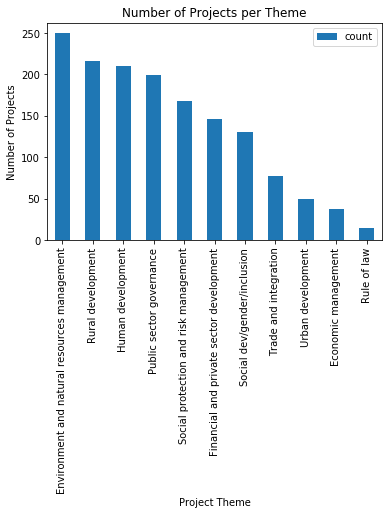

In [51]:
theme_df_trim.plot(kind='bar')

plt.title('Number of Projects per Theme')
plt.xlabel('Project Theme')
plt.ylabel('Number of Projects')
plt.show()

In [52]:
##Exercise 3: In 2. above you will notice that some entries have only the code and the name is missing.
##Create a dataframe with the missing names filled in.

In [53]:
#Approach 1: Iterate & create dictionary for reference later

#Create dict to map codes to names
dd = {}

#Iterate through column and tally
for entry in df['mjtheme_namecode']:
    for item in entry:
        
        #Store name for code (if not already present)
        if (item['name'] != ""):
            dd[item['code']] = item['name']

In [54]:
#Separate column as series
col = df['mjtheme_namecode'].copy()

#Iterate through col and use previously defined dict (dd) to fill in any blanks
for entry in col:
    for item in entry:
        #Store name for code (if not already present)
        if (item['name'] == ""):
            item['name'] = dd[item['code']]
            
#Inspect to ensure blank entries filled
for i in range(5):
    print("Entry %d: " % i)
    print(col[i])

Entry 0: 
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u'Environment and natural resources management'}]
Entry 1: 
[{u'code': u'1', u'name': u'Economic management'}, {u'code': u'6', u'name': u'Social protection and risk management'}]
Entry 2: 
[{u'code': u'5', u'name': u'Trade and integration'}, {u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'6', u'name': u'Social protection and risk management'}]
Entry 3: 
[{u'code': u'7', u'name': u'Social dev/gender/inclusion'}, {u'code': u'7', u'name': u'Social dev/gender/inclusion'}]
Entry 4: 
[{u'code': u'5', u'name': u'Trade and integration'}, {u'code': u'4', u'name': u'Financial and private sector development'}]


In [63]:
#Approach 2: df.apply (Much cleaner!)
df2 = df_RAW.copy()
#df2['mjtheme_namecode'] = col

for i in range(5):
    print("Entry %d: " % i)
    print(df2['mjtheme_namecode'][i])

Entry 0: 
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]
Entry 1: 
[{u'code': u'1', u'name': u'Economic management'}, {u'code': u'6', u'name': u'Social protection and risk management'}]
Entry 2: 
[{u'code': u'5', u'name': u'Trade and integration'}, {u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'6', u'name': u'Social protection and risk management'}]
Entry 3: 
[{u'code': u'7', u'name': u'Social dev/gender/inclusion'}, {u'code': u'7', u'name': u'Social dev/gender/inclusion'}]
Entry 4: 
[{u'code': u'5', u'name': u'Trade and integration'}, {u'code': u'4', u'name': u'Financial and private sector development'}]


In [56]:
def fill_missing(row):
    if row['name'] == '':
        return theme_df_grouped[theme_df_grouped['code'] == row['code']]['name'] #Use previous groupby
    else:
        return row['name'] #Return current value

In [57]:
theme_df2 = pd.concat([pd.DataFrame(json_normalize(table)) for table in df2['mjtheme_namecode']])
theme_df2['name'] = theme_df2.apply(fill_missing, axis=1)
print(theme_df2.head(10))

assert len(theme_df2[theme_df2.name == '']) == 0

  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
0    1                           Economic management
1    6         Social protection and risk management
0    5                         Trade and integration
1    2                      Public sector governance
2   11  Environment and natural resources management
3    6         Social protection and risk management
0    7                   Social dev/gender/inclusion
1    7                   Social dev/gender/inclusion
